Import Libraries

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Connect To Database

In [2]:
try:
    cnx = mysql.connector.connect(user='root', password='Superboy2008@#$',
                              host='localhost',
                              database='chelseachannel')
except mysql.connector.Error as err:
    print(err)

Querying Data From Database

In [3]:
cursor = cnx.cursor()
query = ("SELECT * from videos")
cursor.execute(query)

videos = []
for item in cursor:
    videos.append(item)

cursor.close()

True

Put Videos in to DataFrame

In [4]:
videos_df = pd.DataFrame(videos, 
                         columns=['videoid', 'title', 'publishedAt', 'duration', 
                                  'viewCount', 'likeCount', 'favoriteCount', 'commentCount'])

videos_df.head()

,videoid,title,publishedAt,duration,viewCount,likeCount,favoriteCount,commentCount
0,-26dydSuThg,Leeds 0 0 Chelsea Premier League Highlights,2021-03-13,145,430363,7240,0,492
1,-5Bm8i2FE78,Mason Mount amp Joe Cole Teamed Up With Sure T...,2021-10-08,267,107590,5557,0,86
2,-6zaHxAp-Sw,Chelsea 2 0 Wolves Mason Mount amp Olivier Gir...,2020-07-26,124,1696970,30166,0,1437
3,-7NDgKCeUrc,"""Super Happy to be Going Back to Wembley "" Mid...",2022-03-19,286,143265,4844,0,311
4,-eKiVyizfWM,The Very Best Team Goals Chelsea Tops,2020-06-07,632,366271,7735,0,315


Start to Perform EDA

In [5]:
videos_df.describe()

,duration,viewCount,likeCount,favoriteCount,commentCount
count,515.000000,5.150000e+02,515.000000,515.0,515.000000
mean,862.433010,7.670347e+05,13395.295146,0.0,591.165049
std,1795.031064,1.029517e+06,14352.887193,0.0,668.716697
min,10.000000,1.843800e+04,742.000000,0.0,10.000000
25%,140.000000,1.735800e+05,4608.500000,0.0,187.000000
50%,288.000000,3.183330e+05,8351.000000,0.0,343.000000
75%,506.000000,9.050195e+05,15729.000000,0.0,749.000000
max,9805.000000,9.166224e+06,125040.000000,0.0,5027.000000


We can drop favoriteCount column, since it is all zeros. We can also drop videoid, since they are not useful in EDA

In [6]:
videos_df = videos_df.drop(columns=['videoid', 'favoriteCount'])
videos_df.head()

,title,publishedAt,duration,viewCount,likeCount,commentCount
0,Leeds 0 0 Chelsea Premier League Highlights,2021-03-13,145,430363,7240,492
1,Mason Mount amp Joe Cole Teamed Up With Sure T...,2021-10-08,267,107590,5557,86
2,Chelsea 2 0 Wolves Mason Mount amp Olivier Gir...,2020-07-26,124,1696970,30166,1437
3,"""Super Happy to be Going Back to Wembley "" Mid...",2022-03-19,286,143265,4844,311
4,The Very Best Team Goals Chelsea Tops,2020-06-07,632,366271,7735,315


Plot the Distribution For Each Quantitive Column

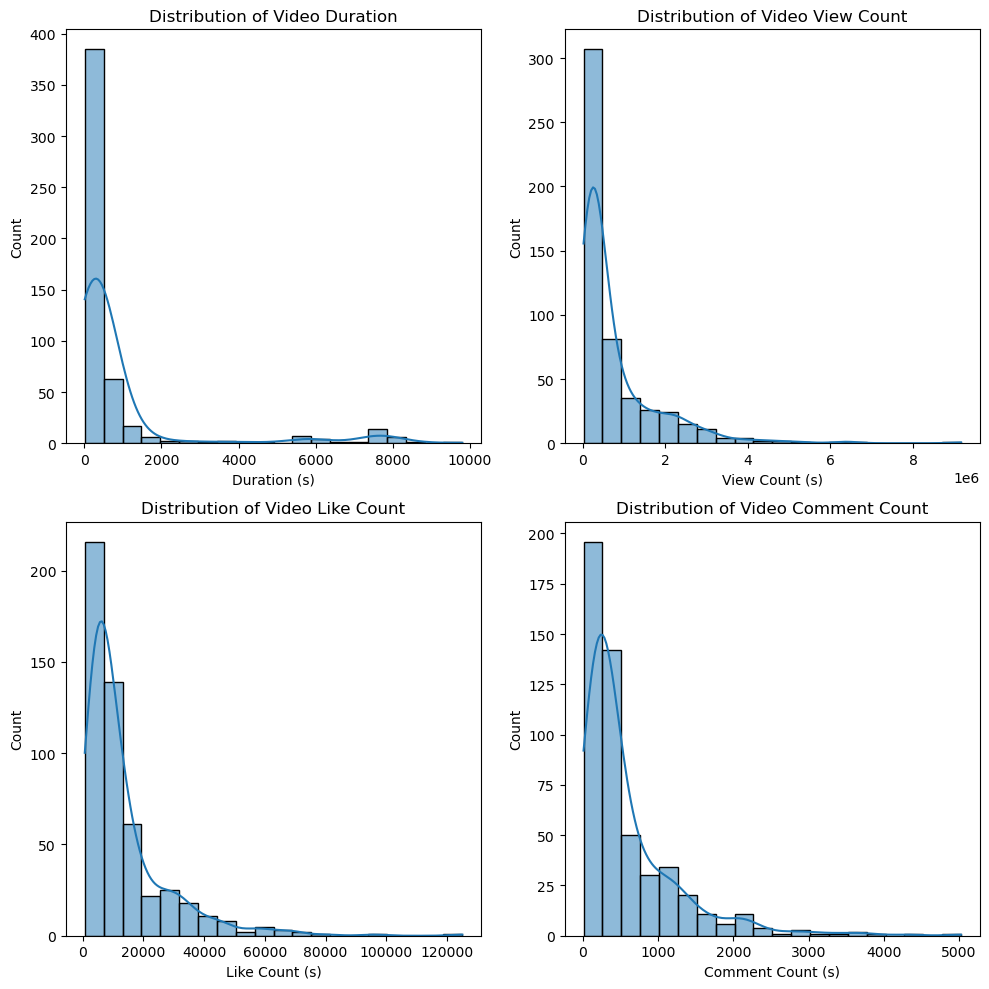

In [10]:
fig = plt.figure(figsize=(10, 10), tight_layout=True)

plt.subplot(221)
sns.histplot(videos_df['duration'], kde=True, bins=20)
plt.title('Distribution of Video Duration')
plt.xlabel('Duration (s)')

plt.subplot(222)
sns.histplot(videos_df['viewCount'], kde=True, bins=20)
plt.title('Distribution of Video View Count')
plt.xlabel('View Count (s)')

plt.subplot(223)
sns.histplot(videos_df['likeCount'], kde=True, bins=20)
plt.title('Distribution of Video Like Count')
plt.xlabel('Like Count (s)')

plt.subplot(224)
sns.histplot(videos_df['commentCount'], kde=True, bins=20)
plt.title('Distribution of Video Comment Count')
plt.xlabel('Comment Count (s)')

plt.show()

Correlation Matrix

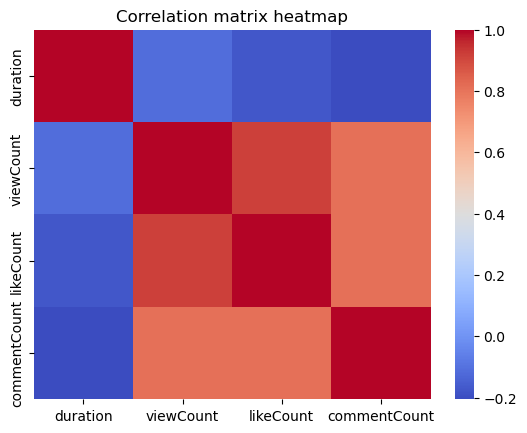

In [12]:
corr = videos_df.iloc[:,2:].corr()
plt.title('Correlation matrix heatmap')
sns.heatmap(corr, cmap='coolwarm')
plt.show()

As expected, the number of views, likes, and comments of the video has high correlation. The more number of views a video has, the more likely it will be liked or commented. Besides that, duration has low correlation with number of views, likes and comments.